## Myocytes and cytoplasmic myocytes

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
ad = sc.read('../../alltissue_v5__myocytes_20210204.h5ad')
ad

AnnData object with n_obs × n_vars = 209126 × 17695
    obs: 'n_genes', 'fpr', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'Participant ID', 'Container', 'Sample ID short', 'RIN score from PAXgene tissue Aliquot', 'RIN score from Frozen tissue Aliquot', 'Age', 'BMI', 'Race/Ethnicity', 'Autolysis Score', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'n_counts', 'tissue-individual-prep', 'Broad cell type', 'Granular cell type', 'batch_triplet', 'introns', 'junctions', 'exons', 'sense', 'antisense', 'intergenic', 'batch-barcode', 'exon_ratio', 'intron_ratio', 'junction_ratio', 'log10_nUMIs', 'leiden', 'leiden_tissue', 'Tissue composition', 'Cell types level 2', 'Cell types level 3', 'Broad cell type numbers', 'Broad cell type (numbers)', 'Tissue', 'channel', 'ischemic_time', 'Participant_ID', 'Sample_ID'
    var: 'gene_ids', 'Chromosome', 'Source', 'Start', 'End', '

In [3]:
heart = ad[ad.obs.tissue == 'heart'].copy()
skm = ad[ad.obs.tissue == 'skeletalmuscle'].copy()

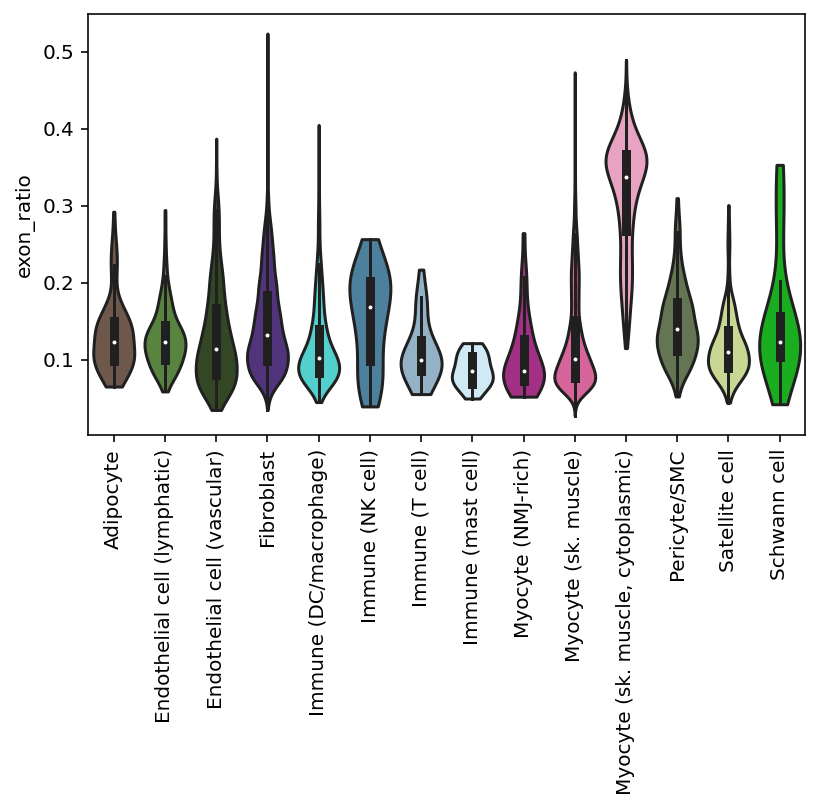

In [4]:
sc.pl.violin(skm, 'exon_ratio', 'Broad cell type', rotation=90, inner='box', stripplot=False)

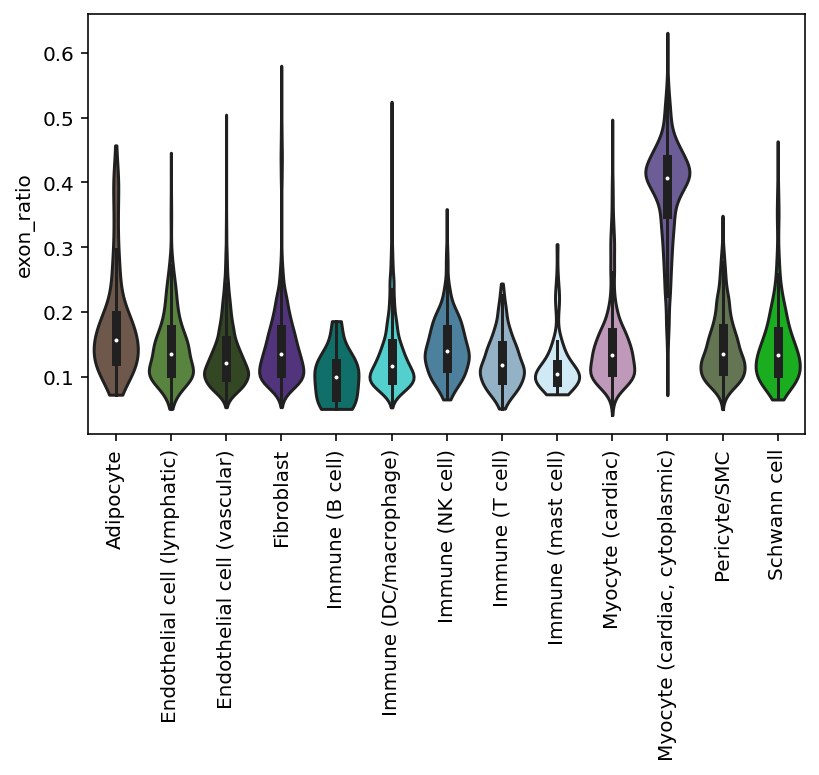

In [5]:
sc.pl.violin(heart, 'exon_ratio', 'Broad cell type', rotation=90, inner='box', stripplot=False)

In [8]:
sc.tl.rank_genes_groups(heart, 'Broad cell type', use_raw=False, groups=['Myocyte (cardiac)'], reference='Myocyte (cardiac, cytoplasmic)')
sc.tl.rank_genes_groups(skm, 'Broad cell type', use_raw=False, groups=['Myocyte (sk. muscle)'], reference='Myocyte (sk. muscle, cytoplasmic)')

In [9]:
skm_df = sc.get.rank_genes_groups_df(skm, 'Myocyte (sk. muscle)', pval_cutoff=0.05)
heart_df = sc.get.rank_genes_groups_df(heart, 'Myocyte (cardiac)', pval_cutoff=0.05)

In [10]:
skm_my = skm[skm.obs['Broad cell type'].isin(['Myocyte (sk. muscle)', 'Myocyte (sk. muscle, cytoplasmic)'])]
skm_alpha = pd.DataFrame((skm_my.X!=0).A, index=skm_my.obs.index, columns=skm_my.var_names).groupby(skm_my.obs['Broad cell type']).mean()
skm_alpha = skm_alpha.T.reset_index().rename(columns={'index': 'names', 'Myocyte (sk. muscle)': 'myocyte_alpha', 'Myocyte (sk. muscle, cytoplasmic)': 'myocyte_cytoplasmic_alpha'})
skm_alpha.columns.name = None

In [11]:
skm_mu = pd.DataFrame(skm_my.X.A, index=skm_my.obs.index, columns=skm_my.var_names).groupby(skm_my.obs['Broad cell type']).mean()
skm_mu = skm_mu.T.reset_index().rename(columns={'index': 'names', 'Myocyte (sk. muscle)': 'myocyte_mean', 'Myocyte (sk. muscle, cytoplasmic)': 'myocyte_cytoplasmic_mean'})
skm_mu.columns.name = None

In [12]:
skm_df = skm_df.merge(skm_alpha, how='left').merge(skm_mu, how='left')
skm_df

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean
0,TBC1D8,45.183605,3.836980,6.661386e-227,7.858215e-224,0.832370,0.274382,2.795156,0.730061
1,PDXDC1,43.830235,3.613560,6.297829e-223,6.965006e-220,0.746004,0.239272,2.382969,0.589820
2,DMD,42.226109,4.278789,6.094579e-204,5.675978e-201,0.976411,0.427828,4.179442,1.461889
3,PDE4D,40.641529,4.273749,2.512435e-195,1.434114e-192,0.973233,0.473342,4.433600,1.668279
4,MLIP,40.308075,3.628461,2.203268e-195,1.299561e-192,0.908531,0.387516,3.263241,1.109322
...,...,...,...,...,...,...,...,...,...
10873,CRYAB,-58.261360,-7.323828,5.848081e-286,2.069636e-282,0.049538,0.867360,0.134585,3.181391
10874,CA3,-59.561485,-13.361375,3.828515e-290,1.693639e-286,0.001348,0.860858,0.003800,3.715117
10875,ACTA1,-61.945969,-13.882132,5.328394e-301,3.142865e-297,0.001685,0.869961,0.005507,4.435369
10876,DES,-66.978111,-10.533690,1.976263e-323,1.748498e-319,0.009965,0.894668,0.028110,3.767242


In [13]:
heart_my = heart[heart.obs['Broad cell type'].isin(['Myocyte (cardiac)', 'Myocyte (cardiac, cytoplasmic)'])]
heart_alpha = pd.DataFrame((heart_my.X!=0).A, index=heart_my.obs.index, columns=heart_my.var_names).groupby(heart_my.obs['Broad cell type']).mean()
heart_alpha = heart_alpha.T.reset_index().rename(columns={'index': 'names', 'Myocyte (cardiac)': 'myocyte_alpha', 'Myocyte (cardiac, cytoplasmic)': 'myocyte_cytoplasmic_alpha'})
heart_alpha.columns.name = None

In [14]:
heart_mu = pd.DataFrame(heart_my.X.A, index=heart_my.obs.index, columns=heart_my.var_names).groupby(heart_my.obs['Broad cell type']).mean()
heart_mu = heart_mu.T.reset_index().rename(columns={'index': 'names', 'Myocyte (cardiac)': 'myocyte_mean', 'Myocyte (cardiac, cytoplasmic)': 'myocyte_cytoplasmic_mean'})
heart_mu.columns.name = None

In [15]:
heart_df = heart_df.merge(heart_alpha, how='left').merge(heart_mu, how='left')
heart_df

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean
0,CACNA1C,113.645752,5.462105,0.0,0.0,0.931544,0.236750,3.634872,0.608142
1,CACNB2,111.294220,5.158666,0.0,0.0,0.890072,0.174855,2.893993,0.390521
2,MAGI1,101.257240,4.666420,0.0,0.0,0.908820,0.224371,2.878054,0.507281
3,CTNNA3,100.488144,4.864869,0.0,0.0,0.916631,0.275435,3.387151,0.683540
4,ERBB4,98.810768,4.707958,0.0,0.0,0.849453,0.143520,2.339807,0.306649
...,...,...,...,...,...,...,...,...,...
13208,TCAP,-136.137680,-6.215549,0.0,0.0,0.382474,0.968665,0.856679,4.622211
13209,GAPDH,-137.465027,-8.681026,0.0,0.0,0.030962,0.916828,0.057169,3.224792
13210,DES,-158.678009,-6.694685,0.0,0.0,0.383042,0.975629,0.891581,5.011024
13211,TNNC1,-169.048096,-8.770723,0.0,0.0,0.060503,0.953965,0.113070,3.975671


In [16]:
heart_df.tail()

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean
13208,TCAP,-136.137680,-6.215549,0.0,0.0,0.382474,0.968665,0.856679,4.622211
13209,GAPDH,-137.465027,-8.681026,0.0,0.0,0.030962,0.916828,0.057169,3.224792
13210,DES,-158.678009,-6.694685,0.0,0.0,0.383042,0.975629,0.891581,5.011024
13211,TNNC1,-169.048096,-8.770723,0.0,0.0,0.060503,0.953965,0.113070,3.975671
13212,MB,-192.265167,-8.323383,0.0,0.0,0.123420,0.968279,0.225361,4.406348


In [17]:
skm_df.tail()

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean
10873,CRYAB,-58.261360,-7.323828,5.848081e-286,2.069636e-282,0.049538,0.867360,0.134585,3.181391
10874,CA3,-59.561485,-13.361375,3.828515e-290,1.693639e-286,0.001348,0.860858,0.003800,3.715117
10875,ACTA1,-61.945969,-13.882132,5.328394e-301,3.142865e-297,0.001685,0.869961,0.005507,4.435369
10876,DES,-66.978111,-10.533690,1.976263e-323,1.748498e-319,0.009965,0.894668,0.028110,3.767242
10877,MB,-102.560059,-13.562332,0.000000e+00,0.000000e+00,0.002889,0.954486,0.008855,4.687605


In [18]:
heart_df.head(2000).to_excel('heart_myocyte_regular_up.xlsx', index=False)
heart_df.tail(2000).sort_values('scores').to_excel('heart_myocyte_cytoplasmic_up.xlsx', index=False)

skm_df.head(2000).to_excel('skm_myocyte_regular_up.xlsx', index=False)
skm_df.tail(2000).sort_values('scores').to_excel('skm_myocyte_cytoplasmic_up.xlsx', index=False) 

## SKM

In [19]:
highlights = 'DMD,MLIP,MPV17,MYPN,KCNQ5,LARGE,MB,DES,ACTA1,TNNT1,TNNC1,MYH7,TNNI1'.split(',')
highlights

['DMD',
 'MLIP',
 'MPV17',
 'MYPN',
 'KCNQ5',
 'LARGE',
 'MB',
 'DES',
 'ACTA1',
 'TNNT1',
 'TNNC1',
 'MYH7',
 'TNNI1']

In [20]:
de = skm_df.copy()

In [21]:
de['logFDR'] = -np.log10(de.pvals_adj)

/home/gokcen/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


In [22]:
logfc_limit = 18

de['logFDR'] = np.minimum(de['logFDR'], 300)
de['logfoldchanges'] = np.minimum(de['logfoldchanges'], logfc_limit)
de['logfoldchanges'] = np.maximum(de['logfoldchanges'], -logfc_limit)

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-cytoplasmic-vs-regular-A.pdf
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


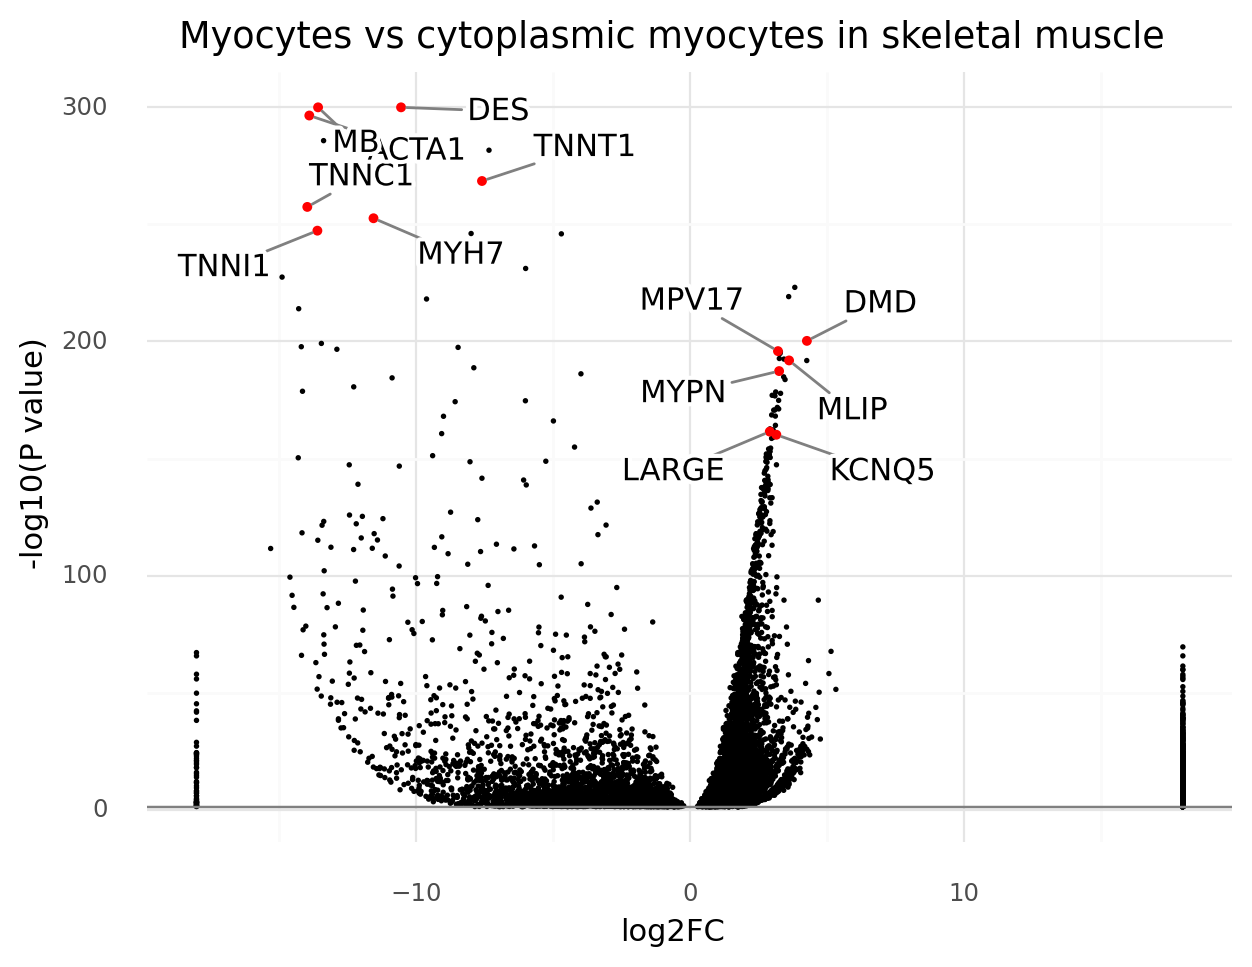

<ggplot: (8776641478397)>

In [23]:
text_idx = de.names.isin(highlights) & (de.logFDR>1)
adjust_text_dict = {
    'expand_points': (2, 2.5),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'gray'
    }
}

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()]

g = (
    ggplot(de, aes(x='logfoldchanges', y='logFDR')) + 
    geom_point(size=0.1, data=de[(de.logFDR>1)]) + 
    geom_point(size=0.05, color='lightgray', data=de[(de.logFDR<1)]) +     
    geom_point(color='red', size=1, data=de[(de.logFDR>1) & (text_idx)]) + 
    geom_text(aes(label='names'), data=de[de.names.isin(highlights)], adjust_text=adjust_text_dict, path_effects=pe) +
    geom_hline(yintercept=1, color='gray') +
    labs(y='-log10(P value)', x='log2FC', title='Myocytes vs cytoplasmic myocytes in skeletal muscle') +
    scale_color_cmap_d('tab10') + 
    scale_x_continuous(limits=[-logfc_limit, logfc_limit]) +
    theme_minimal() +
    theme(figure_size=(7,5))
)

ggsave(g, 'figure-cytoplasmic-vs-regular-A.pdf')

g

## Heart

In [24]:
highlights = 'DMD,MLIP,MPV17,MYPN,LARGE,MB,DES,ACTA1,TNNT1,TNNC1,MYH7'.split(',') + 'MB,TNNC1,DES,MYL3,S100A1,MYL2,CKM,TPM1,CACNA1C,CACNB2,CTNNA3,ERBB4,SOX6,DMD,MYO18B'.split(',')
highlights

['DMD',
 'MLIP',
 'MPV17',
 'MYPN',
 'LARGE',
 'MB',
 'DES',
 'ACTA1',
 'TNNT1',
 'TNNC1',
 'MYH7',
 'MB',
 'TNNC1',
 'DES',
 'MYL3',
 'S100A1',
 'MYL2',
 'CKM',
 'TPM1',
 'CACNA1C',
 'CACNB2',
 'CTNNA3',
 'ERBB4',
 'SOX6',
 'DMD',
 'MYO18B']

In [25]:
de = heart_df.copy()

In [26]:
de['logFDR'] = -np.log10(de.pvals_adj)

/home/gokcen/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


In [27]:
logfc_limit = 12
de['logFDR'] = np.minimum(de['logFDR'], 300)
de['logfoldchanges'] = np.minimum(de['logfoldchanges'], logfc_limit)
de['logfoldchanges'] = np.maximum(de['logfoldchanges'], -logfc_limit)

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-cytoplasmic-vs-regular-B.pdf
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


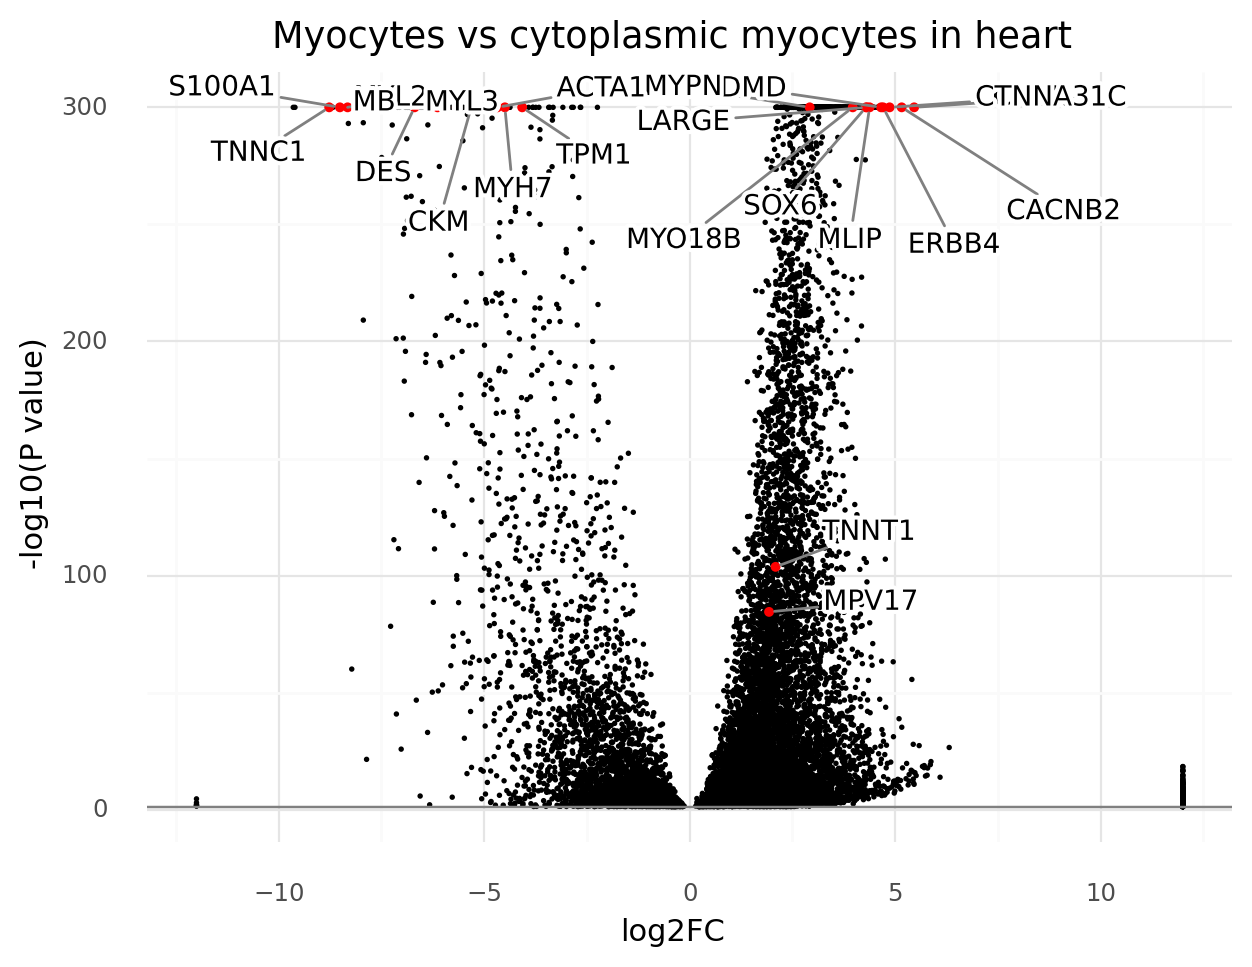

<ggplot: (8776647057146)>

In [28]:
text_idx = de.names.isin(highlights) & (de.logFDR>1)
adjust_text_dict = {
    'expand_points': (2, 2.5),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'gray'
    }
}

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()]

g = (
    ggplot(de, aes(x='logfoldchanges', y='logFDR')) + 
    geom_point(size=0.1, data=de[(de.logFDR>1)]) + 
    geom_point(size=0.05, color='lightgray', data=de[(de.logFDR<1)]) +     
    geom_point(color='red', size=1, data=de[(de.logFDR>1) & (text_idx)]) + 
    geom_text(aes(label='names'), size=10, data=de[de.names.isin(highlights)], adjust_text=adjust_text_dict, path_effects=pe) +
    geom_hline(yintercept=1, color='gray') +
    labs(y='-log10(P value)', x='log2FC', title='Myocytes vs cytoplasmic myocytes in heart') +
    scale_color_cmap_d('tab10') + 
    scale_x_continuous(limits=[-logfc_limit, logfc_limit]) +
    theme_minimal() +
    theme(figure_size=(7,5))
)

ggsave(g, 'figure-cytoplasmic-vs-regular-B.pdf')

g

## Highlight cytoploasmic cardiomyocyte genes from Tucker et al.

In [29]:
tucker_markers = pd.read_excel('tucker_etal_DE.xlsx', sheet_name=2)
tucker_markers = tucker_markers[(tucker_markers['Cell Type'] == 'Cardiomyocyte') & (tucker_markers.Gene.isin(skm_df.names.tolist() + heart_df.names.tolist()))].reset_index()
tucker_markers

,index,Cell Type,Sub-cluster,Gene,Ensembl ID,Chromosome,Pct.Target,Pct.Other,avg_logFC,AUC,PPV50,Marker
0,0,Cardiomyocyte,CM-S1,NPPA,ENSG00000175206,1,0.941,0.010,3.263,0.968,0.989011,1.0
1,1,Cardiomyocyte,CM-S1,MYL7,ENSG00000106631,7,0.914,0.097,2.621,0.944,0.904192,1.0
2,2,Cardiomyocyte,CM-S1,MYH6,ENSG00000197616,14,0.960,0.597,1.791,0.931,0.616529,1.0
3,3,Cardiomyocyte,CM-S1,CALD1,ENSG00000122786,7,0.950,0.701,1.709,0.916,0.575541,1.0
4,4,Cardiomyocyte,CM-S1,PRKAG2,ENSG00000106617,7,0.907,0.452,2.148,0.912,0.667395,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,318,Cardiomyocyte,CM-S5,TUBA3D,ENSG00000075886,2,0.070,0.006,0.172,0.532,0.925787,0.0
244,321,Cardiomyocyte,CM-S5,SEC61G,ENSG00000132432,7,0.063,0.007,0.152,0.528,0.900688,0.0
245,322,Cardiomyocyte,CM-S5,IFI27,ENSG00000165949,14,0.061,0.005,0.192,0.528,0.923555,0.0
246,323,Cardiomyocyte,CM-S5,SLCO4A1,ENSG00000101187,20,0.061,0.005,0.144,0.528,0.928614,0.0


In [30]:
top = 15

cm_markers = tucker_markers.rename(columns={'Sub-cluster': 'subcluster'}).copy()
cm_markers.subcluster.iloc[cm_markers.subcluster != 'CM-S5'] = 'Myocyte'
cm_markers.subcluster.iloc[cm_markers.subcluster == 'CM-S5'] = 'Cytoplasmic myocyte'
cm_markers = cm_markers.groupby('Gene')[['subcluster']].agg(lambda x: ','.join(sorted(np.unique(x)))).reset_index()

top_markers = tucker_markers.rename(columns={'Sub-cluster': 'subcluster'}).copy()
top_markers.subcluster.iloc[top_markers.subcluster != 'CM-S5'] = 'Myocyte'
top_markers.subcluster.iloc[top_markers.subcluster == 'CM-S5'] = 'Cytoplasmic myocyte'
top_markers = top_markers.loc[top_markers.groupby('subcluster').AUC.nlargest(top).reset_index().level_1.values].copy()
top_markers = top_markers.groupby('Gene')[['subcluster']].agg(lambda x: ','.join(x)).reset_index()

/home/gokcen/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
cm_markers

,Gene,subcluster
0,ABCA6,Cytoplasmic myocyte
1,ABCA9,Cytoplasmic myocyte
2,ABHD2,Myocyte
3,ACSM3,Cytoplasmic myocyte
4,ACTA1,"Cytoplasmic myocyte,Myocyte"
...,...,...
233,VWF,Cytoplasmic myocyte
234,WBSCR17,Myocyte
235,XYLT1,Myocyte
236,ZNF385B,Myocyte


In [32]:
cm_markers = cm_markers.merge(top_markers.rename(columns={'subcluster': 'topmarker'}), how='left')

highlights = lfc_df.sort_values('AUC', ascending=False).head(20).names.values
highlights

### SKM

In [33]:
de = skm_df.copy()

In [34]:
de = de.merge(cm_markers, how='left', right_on='Gene', left_on='names')
de

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean,Gene,subcluster,topmarker
0,TBC1D8,45.183605,3.836980,6.661386e-227,7.858215e-224,0.832370,0.274382,2.795156,0.730061,NaN,NaN,NaN
1,PDXDC1,43.830235,3.613560,6.297829e-223,6.965006e-220,0.746004,0.239272,2.382969,0.589820,NaN,NaN,NaN
2,DMD,42.226109,4.278789,6.094579e-204,5.675978e-201,0.976411,0.427828,4.179442,1.461889,NaN,NaN,NaN
3,PDE4D,40.641529,4.273749,2.512435e-195,1.434114e-192,0.973233,0.473342,4.433600,1.668279,PDE4D,Myocyte,NaN
4,MLIP,40.308075,3.628461,2.203268e-195,1.299561e-192,0.908531,0.387516,3.263241,1.109322,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10873,CRYAB,-58.261360,-7.323828,5.848081e-286,2.069636e-282,0.049538,0.867360,0.134585,3.181391,CRYAB,Cytoplasmic myocyte,Cytoplasmic myocyte
10874,CA3,-59.561485,-13.361375,3.828515e-290,1.693639e-286,0.001348,0.860858,0.003800,3.715117,NaN,NaN,NaN
10875,ACTA1,-61.945969,-13.882132,5.328394e-301,3.142865e-297,0.001685,0.869961,0.005507,4.435369,ACTA1,"Cytoplasmic myocyte,Myocyte",NaN
10876,DES,-66.978111,-10.533690,1.976263e-323,1.748498e-319,0.009965,0.894668,0.028110,3.767242,DES,Cytoplasmic myocyte,Cytoplasmic myocyte


In [35]:
de['logFDR'] = -np.log10(de.pvals_adj)

/home/gokcen/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10


In [36]:
logfc_limit = 18

de['logFDR'] = np.minimum(de['logFDR'], 300)
de['logfoldchanges'] = np.minimum(de['logfoldchanges'], logfc_limit)
de['logfoldchanges'] = np.maximum(de['logfoldchanges'], -logfc_limit)

In [37]:
de[(de['subcluster'].notnull()) & (de.logFDR>1)]

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean,Gene,subcluster,topmarker,logFDR
3,PDE4D,40.641529,4.273749,2.512435e-195,1.434114e-192,0.973233,0.473342,4.433600,1.668279,PDE4D,Myocyte,NaN,191.843416
5,EYA4,40.043015,3.522102,8.300148e-196,5.064521e-193,0.844358,0.322497,2.854149,0.885427,EYA4,Myocyte,NaN,192.295462
10,MYPN,38.826290,3.264755,8.426491e-191,4.518387e-188,0.767427,0.296489,2.437006,0.735283,MYPN,Myocyte,NaN,187.345017
53,MYO18B,31.174974,2.738267,1.221459e-143,2.275129e-141,0.686982,0.313394,2.183691,0.779686,MYO18B,Myocyte,NaN,140.642994
84,BNC2,28.581730,2.627632,1.027891e-128,1.367559e-126,0.523589,0.197659,1.573942,0.481823,BNC2,Myocyte,NaN,125.864054
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,TCAP,-57.405094,-10.854268,2.880972e-280,8.496466e-277,0.007125,0.853056,0.020695,3.681607,TCAP,Cytoplasmic myocyte,Cytoplasmic myocyte,276.070762
10873,CRYAB,-58.261360,-7.323828,5.848081e-286,2.069636e-282,0.049538,0.867360,0.134585,3.181391,CRYAB,Cytoplasmic myocyte,Cytoplasmic myocyte,281.684106
10875,ACTA1,-61.945969,-13.882132,5.328394e-301,3.142865e-297,0.001685,0.869961,0.005507,4.435369,ACTA1,"Cytoplasmic myocyte,Myocyte",NaN,296.502674
10876,DES,-66.978111,-10.533690,1.976263e-323,1.748498e-319,0.009965,0.894668,0.028110,3.767242,DES,Cytoplasmic myocyte,Cytoplasmic myocyte,300.000000


/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-cytoplasmic-vs-regular-C.pdf


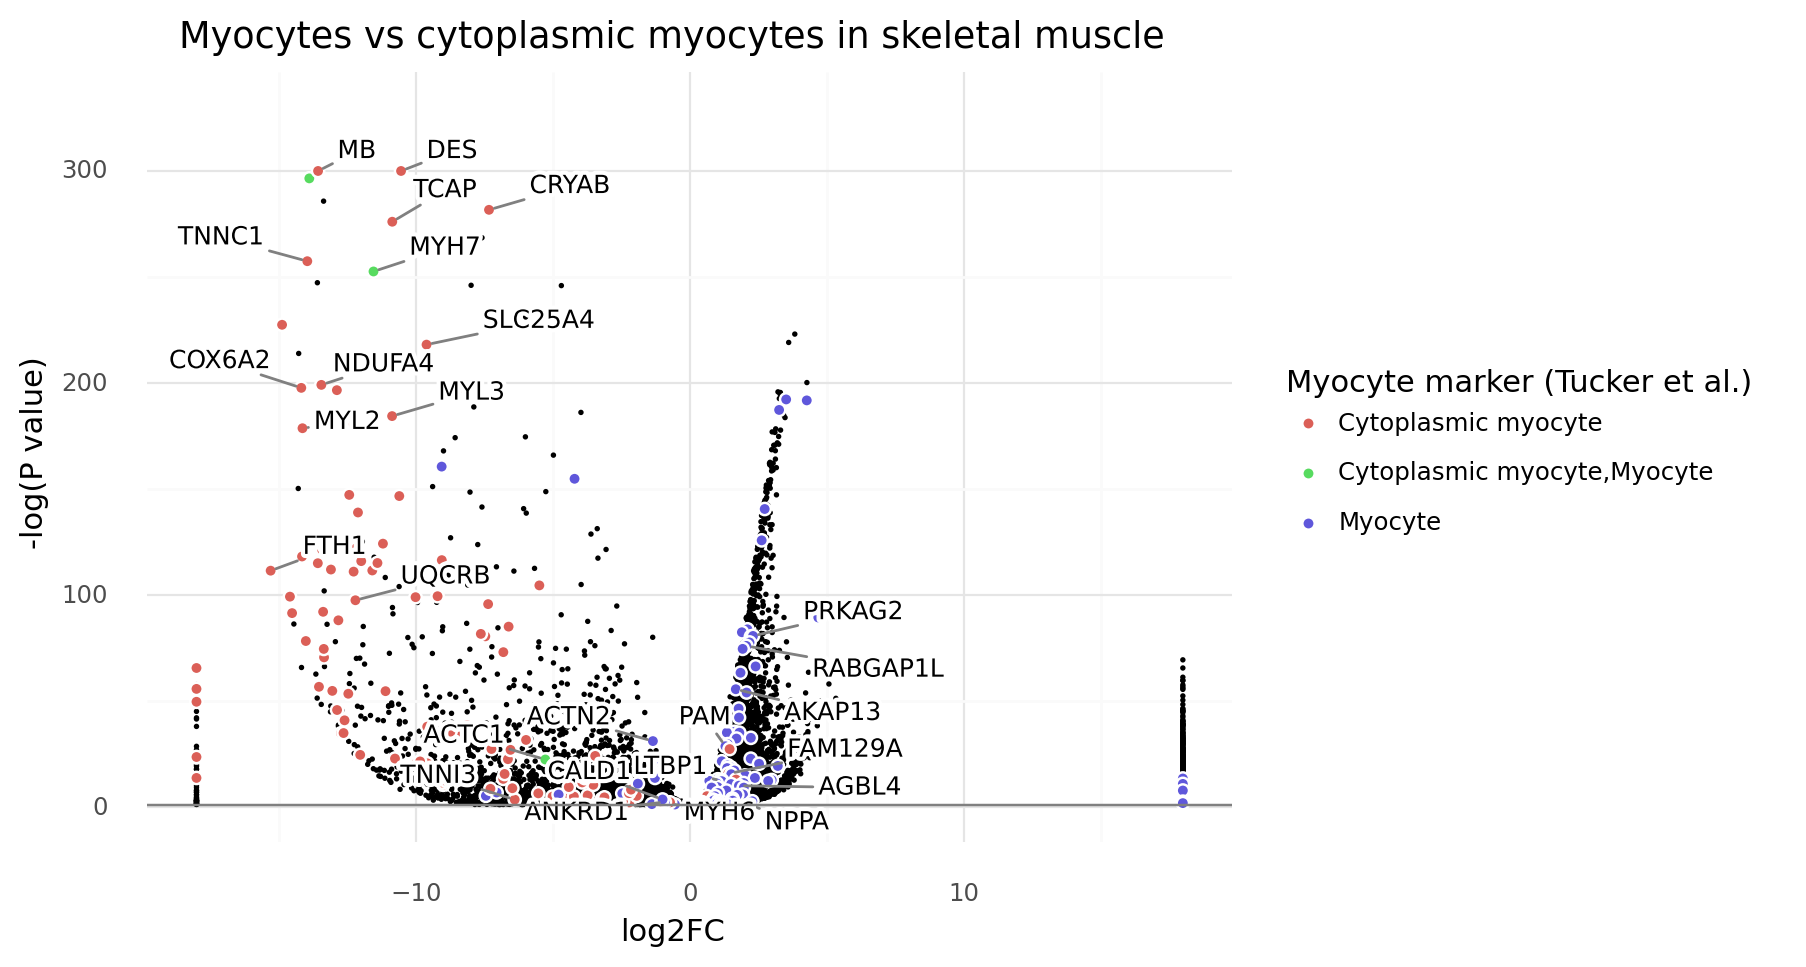

<ggplot: (8776471822249)>

In [38]:
text_idx = de['topmarker'].notnull()
#text_idx = de['subcluster'] == 'Cytoplasmic myocyte'
adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'gray'
    }
}

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()]

g = (
    ggplot(de, aes(x='logfoldchanges', y='logFDR')) + 
    geom_point(size=0.1, data=de[(de.logFDR>1)]) + 
    geom_point(size=0.05, color='lightgray', data=de[(de.logFDR<1)]) +     
    geom_point(aes(fill='subcluster'), color='white', size=2, data=de[de['subcluster'].notnull() & (de.logFDR>1)]) + 
    #geom_point(color='red', size=1, data=de[text_idx]) + 
    geom_text(aes(label='names'), size=9, data=de[text_idx], adjust_text=adjust_text_dict, path_effects=pe) +
    geom_hline(yintercept=1, color='gray') +
    labs(y='-log(P value)', x='log2FC', title='Myocytes vs cytoplasmic myocytes in skeletal muscle', fill='Myocyte marker (Tucker et al.)') +
    #scale_fill_manual(['#FC690F', '#1B62A5', '']) + 
    scale_x_continuous(limits=[-logfc_limit, logfc_limit]) +
    scale_y_continuous(limits=[0, 330]) +    
    theme_minimal() +
    theme(figure_size=(7,5))
)

ggsave(g, 'figure-cytoplasmic-vs-regular-C.pdf')

g

### Heart

In [39]:
de = heart_df.copy()

In [40]:
de = de.merge(cm_markers, how='left', right_on='Gene', left_on='names')
de

,names,scores,logfoldchanges,pvals,pvals_adj,myocyte_alpha,myocyte_cytoplasmic_alpha,myocyte_mean,myocyte_cytoplasmic_mean,Gene,subcluster,topmarker
0,CACNA1C,113.645752,5.462105,0.0,0.0,0.931544,0.236750,3.634872,0.608142,NaN,NaN,NaN
1,CACNB2,111.294220,5.158666,0.0,0.0,0.890072,0.174855,2.893993,0.390521,NaN,NaN,NaN
2,MAGI1,101.257240,4.666420,0.0,0.0,0.908820,0.224371,2.878054,0.507281,NaN,NaN,NaN
3,CTNNA3,100.488144,4.864869,0.0,0.0,0.916631,0.275435,3.387151,0.683540,NaN,NaN,NaN
4,ERBB4,98.810768,4.707958,0.0,0.0,0.849453,0.143520,2.339807,0.306649,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13208,TCAP,-136.137680,-6.215549,0.0,0.0,0.382474,0.968665,0.856679,4.622211,TCAP,Cytoplasmic myocyte,Cytoplasmic myocyte
13209,GAPDH,-137.465027,-8.681026,0.0,0.0,0.030962,0.916828,0.057169,3.224792,GAPDH,Cytoplasmic myocyte,NaN
13210,DES,-158.678009,-6.694685,0.0,0.0,0.383042,0.975629,0.891581,5.011024,DES,Cytoplasmic myocyte,Cytoplasmic myocyte
13211,TNNC1,-169.048096,-8.770723,0.0,0.0,0.060503,0.953965,0.113070,3.975671,TNNC1,Cytoplasmic myocyte,Cytoplasmic myocyte


In [41]:
de['logFDR'] = -np.log(de.pvals_adj)

/home/gokcen/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log


In [42]:
logfc_limit = 12
de['logFDR'] = np.minimum(de['logFDR'], 300)
de['logfoldchanges'] = np.minimum(de['logfoldchanges'], logfc_limit)
de['logfoldchanges'] = np.maximum(de['logfoldchanges'], -logfc_limit)

/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 7 x 5 in image.
/home/gokcen/.miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure-cytoplasmic-vs-regular-D.pdf


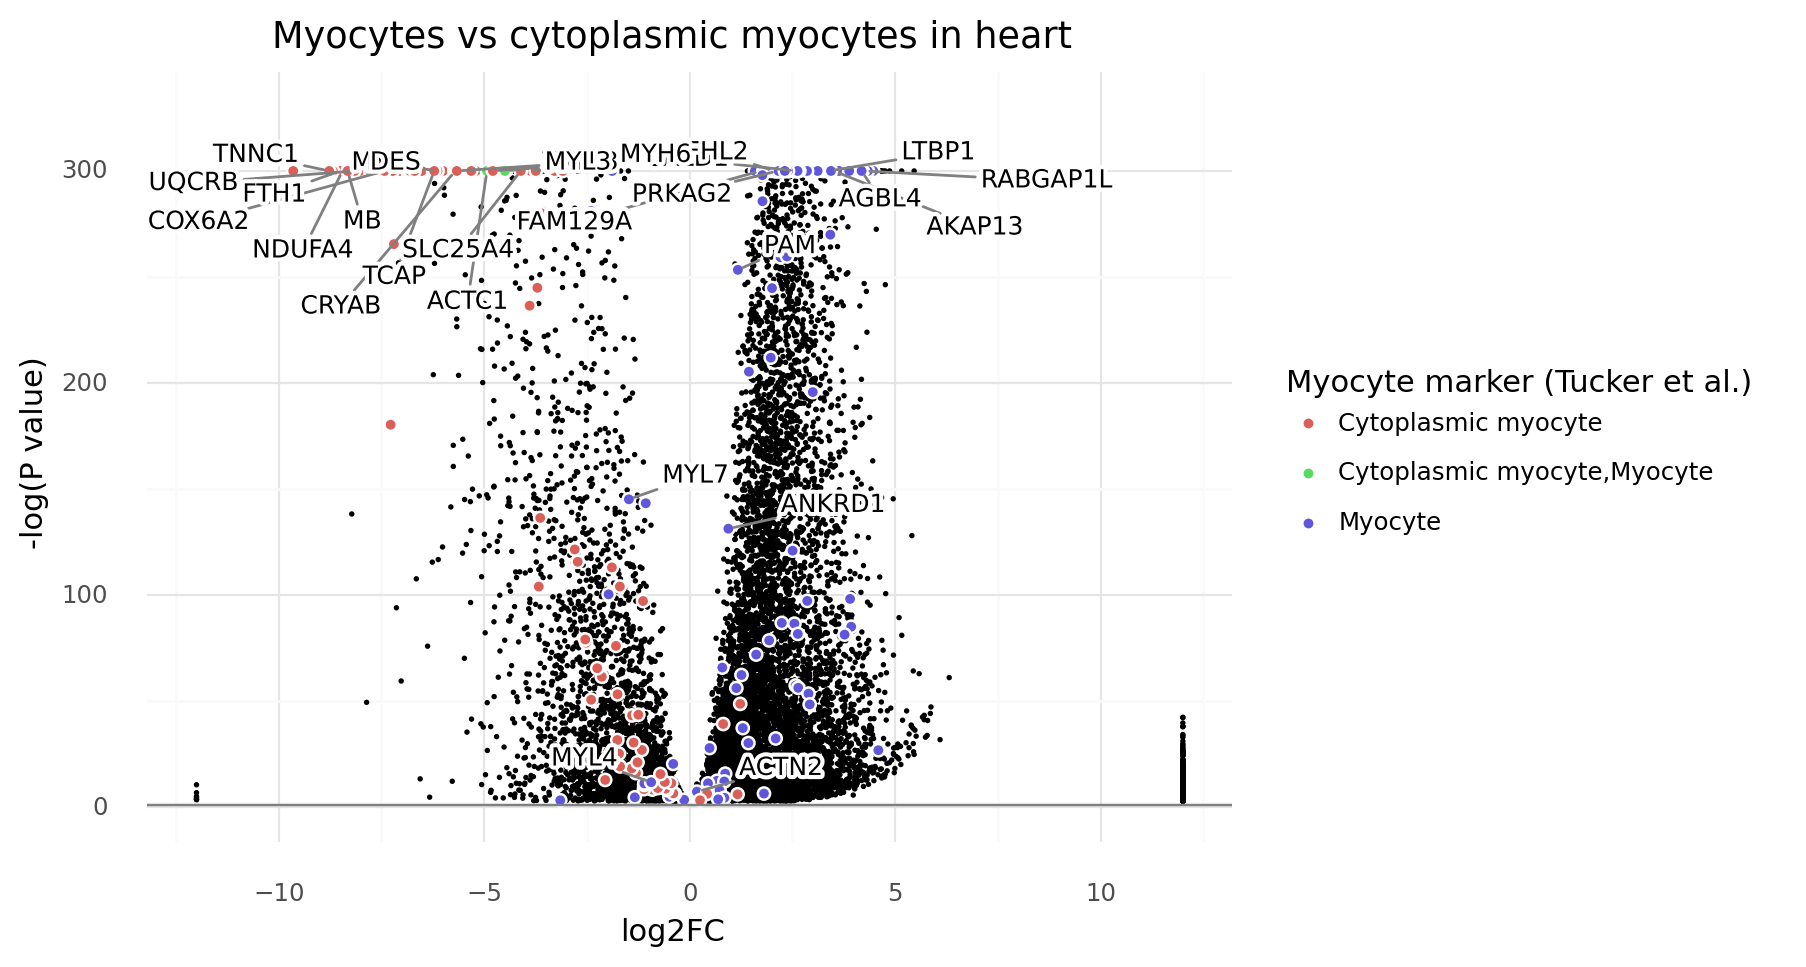

<ggplot: (8776471832619)>

In [43]:
text_idx = de['topmarker'].notnull()
#text_idx = de['subcluster'] == 'Cytoplasmic myocyte'
adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'gray'
    }
}

import matplotlib.patheffects as path_effects
pe = [path_effects.Stroke(linewidth=3, foreground='white'), path_effects.Normal()]

g = (
    ggplot(de, aes(x='logfoldchanges', y='logFDR')) + 
    geom_point(size=0.1, data=de[(de.logFDR>1)]) + 
    geom_point(size=0.05, color='lightgray', data=de[(de.logFDR<1)]) +     
    geom_point(aes(fill='subcluster'), color='white', size=2, data=de[de['subcluster'].notnull() & (de.logFDR>1)]) + 
    #geom_point(color='red', size=1, data=de[text_idx]) + 
    geom_text(aes(label='names'), size=9, data=de[text_idx], adjust_text=adjust_text_dict, path_effects=pe) +
    geom_hline(yintercept=1, color='gray') +
    labs(y='-log(P value)', x='log2FC', title='Myocytes vs cytoplasmic myocytes in heart', fill='Myocyte marker (Tucker et al.)') +
    #scale_fill_manual(['#FC690F', '#1B62A5', '']) + 
    scale_x_continuous(limits=[-logfc_limit, logfc_limit]) +
    scale_y_continuous(limits=[0, 330]) +    
    theme_minimal() +
    theme(figure_size=(7,5))
)

ggsave(g, 'figure-cytoplasmic-vs-regular-D.pdf')

g